In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import pylab
import math
import random
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from pandas.api.types import is_numeric_dtype

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score
from math import sqrt

import xgboost as xg

%matplotlib inline

In [8]:
df = pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры_Краснодар/Выборка_Краснодар.xlsx', sheet_name = 0)
df_1 = df[df['All'] == 0]
df_1 = df_1[df_1['Прогноз(0.32)'] == 0]
df_1.reset_index(drop = True, inplace = True)
df_1

,ID,All,Мусор,Мусор_1,Мусор_2,Прогноз(0.5),Прогноз(0.32),pred_proba_2,pred_proba_1,Цена,...,Исп.2,Unnamed: 63,Сцепка_3,Сцепка_4,Д_ад,Д_ya,Сравнение,Поиск,Текст,Ссылка
0,3_avito,0,0,0.0,0.0,0.0,0.0,0.005016,0.994984,8399000,...,NaN,3.0,5 39.036192 45.010981,"65,5 5 39.036192 45.010981",132,132,1.0,0.0,"Продам 3-комнатную квартиру с Евроремонтом, 65...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...
1,5_avito,0,0,0.0,0.0,0.0,0.0,0.060823,0.939177,11000000,...,NaN,17.0,15 38.970992 45.101935,92 15 38.970992 45.101935,4/4,4/4,1.0,0.0,"Собственник! Продаю без посредников, Квартира ...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...
2,6_avito,0,0,0.0,0.0,0.0,0.0,0.047736,0.952264,3999999,...,NaN,45.0,9 38.905658 45.093702,23 9 38.905658 45.093702,39/2,39/2,1.0,0.0,Агентам не Беспокоить. Дешевле чем от застройщ...,https://www.avito.ru/krasnodar/kvartiry/kvarti...
3,9_avito,0,0,0.0,0.0,0.0,0.0,0.018983,0.981017,2850000,...,NaN,7.0,2 39.029275 45.097119,20 2 39.029275 45.097119,5к3,5к3,1.0,0.0,"Продажа от собственника, никаких риелтор них к...",https://www.avito.ru/krasnodar/kvartiry/kvarti...
4,10_avito,0,0,0.0,0.0,0.0,0.0,0.028921,0.971079,3400000,...,NaN,13.0,7 38.897878 45.077226,"23,5 7 38.897878 45.077226",1/3к7,1/3к7,1.0,0.0,Продаётся уютная студия в ЖК« Светлоград» от с...,https://www.avito.ru/krasnodar/kvartiry/kvarti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12260,34260_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,6100000,...,NaN,72.0,4 39.03868 45.079091,"36,9 4 39.03868 45.079091",NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10785272/
12261,34261_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5998000,...,NaN,32.0,17 39.043307 45.078162,40 17 39.043307 45.078162,NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10541705/
12262,34262_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5500000,...,NaN,72.0,17 39.03868 45.079091,"36,6 17 39.03868 45.079091",NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10355115/
12263,34259_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5369000,...,NaN,72.0,20 39.03868 45.079091,"36,6 20 39.03868 45.079091",NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10328304/


In [9]:
df_1['ГП_1'] = df_1['ГП_1'].astype(int)

In [10]:
X = df_1[[
            'ОПлощадь',
            #'Этаж_1',
            #'Этаж_2',
            #'Этаж_3',
            'Этаж_4',
            'Этажность_1',
            #'Этажность_2',
            'ГП_1',
            #'Ремонт_2',
            'Ремонт_3',
            #'Долгота',
            #'Широта',
            #'Раст_центр_1',
            'Раст_центр_2',
            'Районы_2',
            'Многоуровневость',
            'Терраса',
            'ЖК_БД'
      ]]

Y = df_1['LN(Цена)']

In [11]:
numerical_features = [
                     "ОПлощадь",
                     "Этажность_1",
                     "ГП_1",
                     "Многоуровневость",
                     "Терраса"
                    ]
categorical_features = X.columns.drop(numerical_features)

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#Создаем ColumnTransformer который автоматом преобразует нам категориальные переменные в числовые OneHot
xgb_preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_features),
        ("cat", OneHotEncoder(handle_unknown = "ignore"), categorical_features),
    ]
)

xgb_preprocessor

ColumnTransformer(transformers=[('num', 'passthrough',
                                 ['ОПлощадь', 'Этажность_1', 'ГП_1',
                                  'Многоуровневость', 'Терраса']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['Этаж_4', 'Ремонт_3', 'Раст_центр_2', 'Районы_2', 'ЖК_БД'], dtype='object'))])

In [13]:
transformed_raw = xgb_preprocessor.fit_transform(X)

#xgb_preprocessor.fit(X)
#X = xgb_preprocessor.transform(X)

In [14]:
X_trans = pd.DataFrame(
                       transformed_raw.toarray(), 
                       columns = list(xgb_preprocessor.get_feature_names_out())
                       )
X_trans.head()

,num__ОПлощадь,num__Этажность_1,num__ГП_1,num__Многоуровневость,num__Терраса,cat__Этаж_4_неважно,cat__Этаж_4_первый,cat__Этаж_4_последний,cat__Этаж_4_этажи_11-25,cat__Этаж_4_этажи_2-5,...,cat__Районы_2_Фестивальный,cat__Районы_2_ХБК,cat__Районы_2_Центр,cat__Районы_2_Черемушки,cat__Районы_2_Школьный_Табачная_фабрика,cat__Районы_2_Энка,cat__Районы_2_Юбилейный_СХИ_Кожзавод,cat__ЖК_БД_нет,cat__ЖК_БД_престижный,cat__ЖК_БД_престижный+
0,65.5,5.0,1975.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,92.0,17.0,2010.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,23.0,16.0,2020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,20.0,3.0,2017.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,23.5,10.0,2017.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
#создадим список фичей в сопоставлении с f_name
features_names = list(xgb_preprocessor.get_feature_names_out()) #список имен наших факторов
#features_names
f_name = []
for i in range(len(features_names)):
    f_name.append('f' + str(i))

names = pd.DataFrame(f_name, columns = ['f_name'])
names['features_names'] = features_names
names #список имен наших факторов в сопоставлении с именами ColumnTransformer

,f_name,features_names
0,f0,num__ОПлощадь
1,f1,num__Этажность_1
2,f2,num__ГП_1
3,f3,num__Многоуровневость
4,f4,num__Терраса
5,f5,cat__Этаж_4_неважно
6,f6,cat__Этаж_4_первый
7,f7,cat__Этаж_4_последний
8,f8,cat__Этаж_4_этажи_11-25
9,f9,cat__Этаж_4_этажи_2-5


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X_trans, Y, test_size = 0.20, random_state = 42)

xgboost.train(params, dtrain, num_boost_round=10, *, evals=None, obj=None, feval=None, maximize=None, 
              early_stopping_rounds=None, evals_result=None, verbose_eval=True, xgb_model=None, 
              callbacks=None, custom_metric=None)

Набор данных необходимо преобразовать в DMatrix. Это оптимизированная структура данных, созданная создателями XGBoost. Это дает пакету повышение производительности и эффективности.

In [17]:
train_dmatrix = xg.DMatrix(data = X_train, label = Y_train) 
test_dmatrix = xg.DMatrix(data = X_test, label = Y_test)
#аналогично преобразовывается и новый набор данных

In [30]:
param = {
        "booster": "gbtree", 
        "objective": "reg:squarederror",
        "n_jobs": 4,
        "random_state": 42,
        "learning_rate": 0.1
    }

eval_data = [(train_dmatrix, 'train'), (test_dmatrix, 'eval')]
progress = dict()

xgbr = xg.train(
                params = param, 
                dtrain = train_dmatrix, 
                num_boost_round = 250,   #количество деревьев
                evals = eval_data,
                evals_result = progress,
                early_stopping_rounds = 10,
                verbose_eval = 0
            )

#pred = xgb_r.predict(test_dmatrix) 

MAE на обучении: 531027.0839
RMSE на обучении: 759362.3524
MAPE на обучении: 0.0721
R2 на обучении: 0.9702
MAE на тесте: 686851.012
RMSE на тесте: 1030634.9502
MAPE на тесте: 0.0921
R2 на тесте: 0.9402
MAE: 562191.8695
RMSE: 820820.7027
MAPE: 0.0761
R2: 0.9646


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


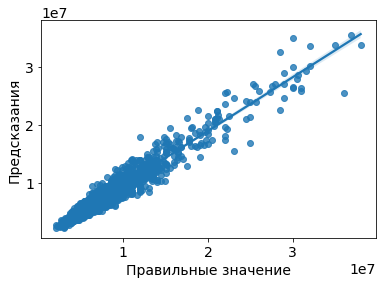

In [31]:
all_dmatrix = xg.DMatrix(data = X_trans, label = Y)
pred_1 = np.exp(xgbr.predict(all_dmatrix))

pred_train = np.exp(xgbr.predict(train_dmatrix))
mse_train = mse(np.exp(Y_train), pred_train)
print("MAE на обучении:", round(mae(np.exp(Y_train), pred_train), 4))
print("RMSE на обучении:", round(sqrt(mse(np.exp(Y_train), pred_train)), 4))
print("MAPE на обучении:", round(mape(np.exp(Y_train), pred_train), 4))
print("R2 на обучении:", round(r2_score(np.exp(Y_train), pred_train), 4))
print("===============================")

pred_test = np.exp(xgbr.predict(test_dmatrix))
mse_test = mse(np.exp(Y_test), pred_test)
print("MAE на тесте:", round(mae(np.exp(Y_test), pred_test), 4))
print("RMSE на тесте:", round(sqrt(mse(np.exp(Y_test), pred_test)), 4))
print("MAPE на тесте:", round(mape(np.exp(Y_test), pred_test), 4))
print("R2 на тесте:", round(r2_score(np.exp(Y_test), pred_test), 4))
print("===============================")

print("MAE:", round(mae(np.exp(Y), pred_1), 4))
print("RMSE:", round(sqrt(mse(np.exp(Y), pred_1)), 4))
print("MAPE:", round(mape(np.exp(Y), pred_1), 4))
print("R2:", round(r2_score(np.exp(Y), pred_1), 4))

sns.regplot(np.exp(Y_test), pred_test)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

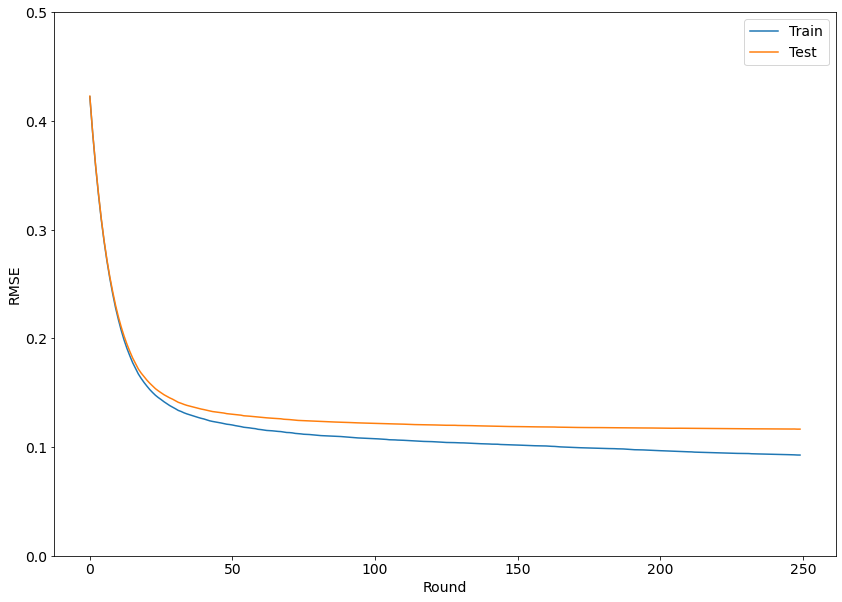

In [35]:
#Строим графикобучения и теста нашей модели

plt.figure(figsize = (14, 10))
plt.rcParams.update({'font.size': 14})
plt.plot(progress['train']['rmse'])
plt.plot(progress['eval']['rmse'])
plt.ylabel('RMSE', fontsize = 14)
plt.ylim([0, 0.5])
plt.xlabel('Round', fontsize = 14)
plt.legend(['Train', 'Test'], loc = 'upper right')
plt.show()

<AxesSubplot: >

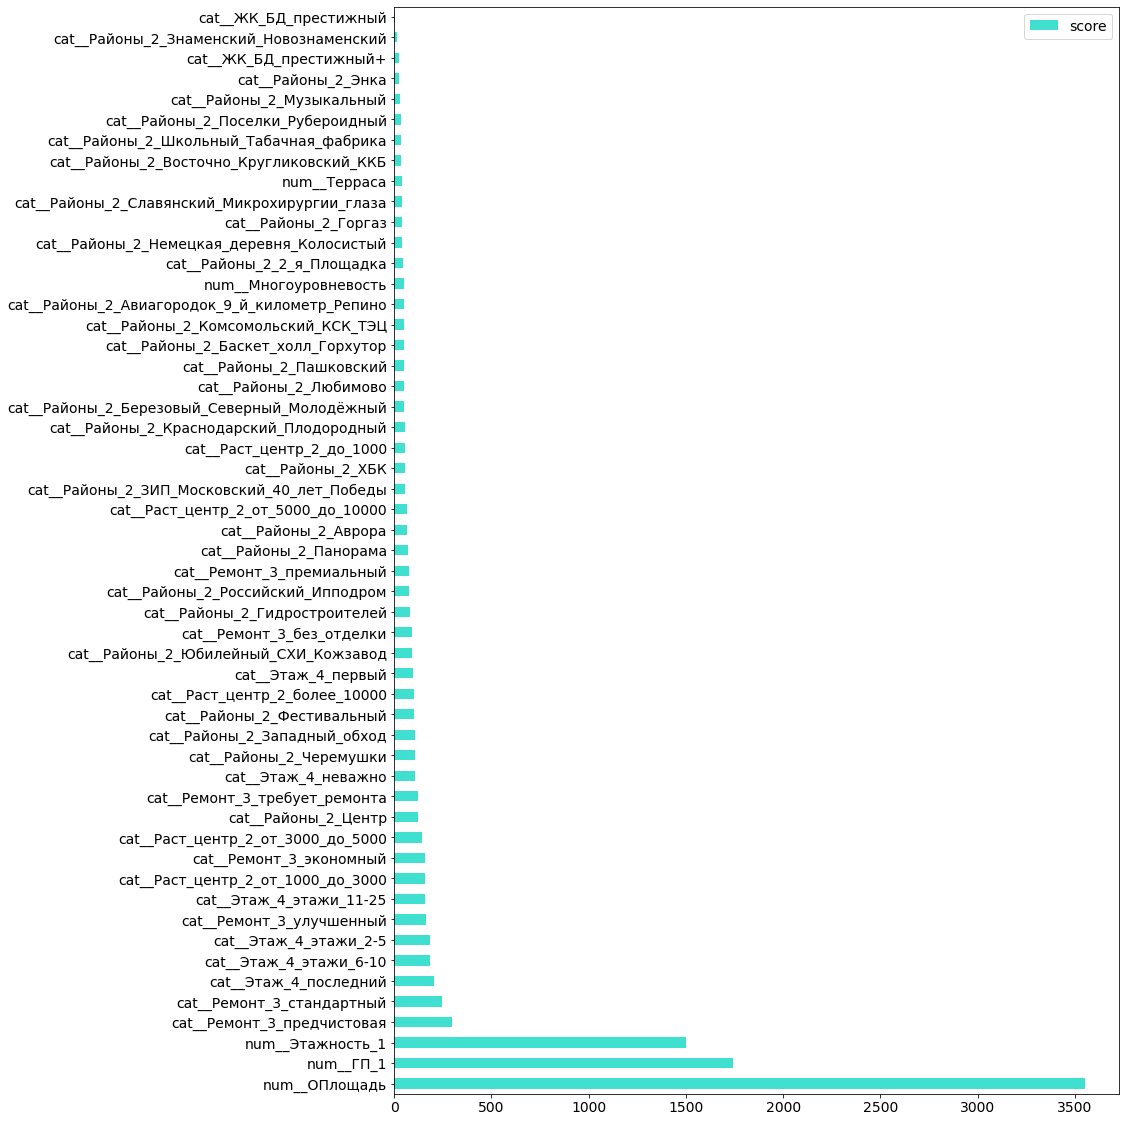

In [37]:
feature_important = xgbr.get_score(importance_type = 'weight')

names_1 = names.drop(index = 51) #при методе 'weight' нулевое значение исключается, поэтому мы исключаем строку 51
names_1 = list(names_1['features_names'])

#keys = list(feature_important.keys())
keys = names_1
values = list(feature_important.values())

data = pd.DataFrame(
                    data = values, 
                    index = keys, 
                    columns = ["score"]
                    ).sort_values(by = "score", ascending = False)

data.nlargest(len(names_1), columns = "score").plot(
                                                      kind = 'barh', 
                                                      color = 'turquoise', 
                                                      figsize = (13, 20)
                                                      )

In [27]:
cross_val = xg.cv(
                    params = param,
                    dtrain = all_dmatrix, 
                    nfold = 3,
                    num_boost_round = 50, 
                    early_stopping_rounds = 10, 
                    metrics = 'rmse', 
                    as_pandas = True, 
                    seed = 42,
                    verbose_eval = 0
            )

print(cross_val.head())

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         0.422112        0.001165        0.422553       0.002322
1         0.388567        0.000983        0.389347       0.002012
2         0.358984        0.000876        0.360144       0.001665
3         0.332671        0.000626        0.334204       0.001568
4         0.309405        0.000536        0.311465       0.001276


xgboost.cv(params, dtrain, num_boost_round=10, nfold=3, stratified=False, folds=None, metrics=(), obj=None, feval=None, 
           maximize=None, early_stopping_rounds=None, fpreproc=None, as_pandas=True, verbose_eval=None, show_stdv=True, 
           seed=0, callbacks=None, shuffle=True, custom_metric=None)

In [28]:
cross_val

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.422112,0.001165,0.422553,0.002322
1,0.388567,0.000983,0.389347,0.002012
2,0.358984,0.000876,0.360144,0.001665
3,0.332671,0.000626,0.334204,0.001568
4,0.309405,0.000536,0.311465,0.001276
5,0.288845,0.000375,0.291208,0.001137
6,0.270784,0.000452,0.273499,0.000766
7,0.254865,0.000281,0.258024,0.000678
8,0.240801,0.000218,0.244362,0.000432
9,0.228223,0.000236,0.232207,0.000345


# Early Stopping

In [ ]:
early_stop = xgb.callback.EarlyStopping(
    rounds=2, metric_name='logloss', data_name='validation_0', save_best=True
)
clf = xgb.XGBClassifier(tree_method="hist", callbacks=[early_stop])
clf.fit(X_train, y_train, eval_set=[(X_test, y_test)])

# CV

In [ ]:
from sklearn.base import clone
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold, cross_validate

import xgboost as xgb

X, y = load_breast_cancer(return_X_y=True)


def fit_and_score(estimator, X_train, X_test, y_train, y_test):
    """Fit the estimator on the train set and score it on both sets"""
    estimator.fit(X_train, y_train, eval_set=[(X_test, y_test)])

    train_score = estimator.score(X_train, y_train)
    test_score = estimator.score(X_test, y_test)

    return estimator, train_score, test_score


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=94)

clf = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=3)

results = {}

for train, test in cv.split(X, y):
    X_train = X[train]
    X_test = X[test]
    y_train = y[train]
    y_test = y[test]
    est, train_score, test_score = fit_and_score(
        clone(clf), X_train, X_test, y_train, y_test
    )
    results[est] = (train_score, test_score)